In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_origin = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [3]:
df = df_origin[df_origin.Site_Name=='En Gedi']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [4]:
# dfWithoutLastYearVisits = df.dropna().drop('last_year_visitors',axis=1)
dfWithoutLastYearVisits = df.drop('last_year_visitors',axis=1).dropna()
dfLastYearVisits = df.dropna()

In [5]:
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1002, 7)
(1381, 6)


In [6]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfLastYearVisits)

c:\Private\חדש למאמר\Git\nature-reserves-paper\Model MLR\..\function.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


In [7]:
coeffDf

,0
Temperature,-509.02698
IsVacation,-133.77636
is_weekend,-82.88392
pm10,432.83690
last_year_visitors,602.38197


rmse 692.6650459223908
std 719.3264043576573


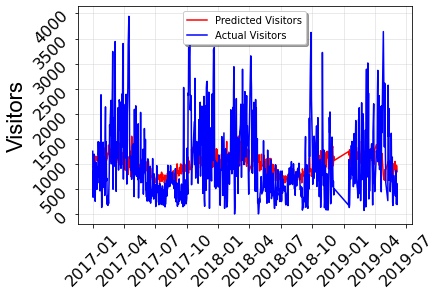

Sample rows:
             Prediction  Actual
Date                           
2017-05-11   960.891245    1033
2018-01-07   977.020082     410
2018-08-18   672.289728     814
2018-08-12   785.358362     380
2018-03-16  1218.404907     992
2017-07-10   722.487664     573
2017-02-09  1253.786895    1449
2018-01-05  1095.773322     293
2017-11-12  1113.455675    2121
2018-06-23   705.471014     890

rmse 656.1200876041006
std 690.7782847249603


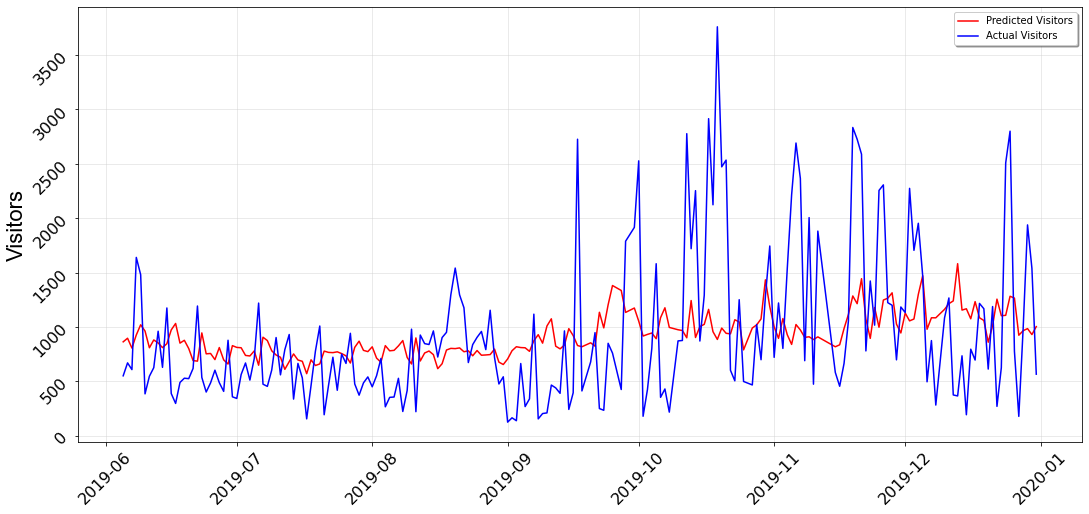

Sample rows:
             Prediction  Actual
Date                           
2019-11-08   903.611644     689
2019-09-24  1203.539287     849
2019-08-17   661.363866     902
2019-06-29   658.283330     877
2019-07-27   667.998790     941
2019-09-17   828.576965    2726
2019-10-02   915.839738     178
2019-06-06   895.649825     669
2019-12-08  1083.470150     281
2019-08-07   825.140375     527


In [8]:
function.printRes(resTrain)
print()

function.printRes(resTest)

In [9]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfWithoutLastYearVisits)


In [10]:
coeffDf

,0
Temperature,-361.27077
IsVacation,-252.16879
is_weekend,-111.26951
pm10,128.16967


rmse 690.6326730724759
std 708.2008142467268


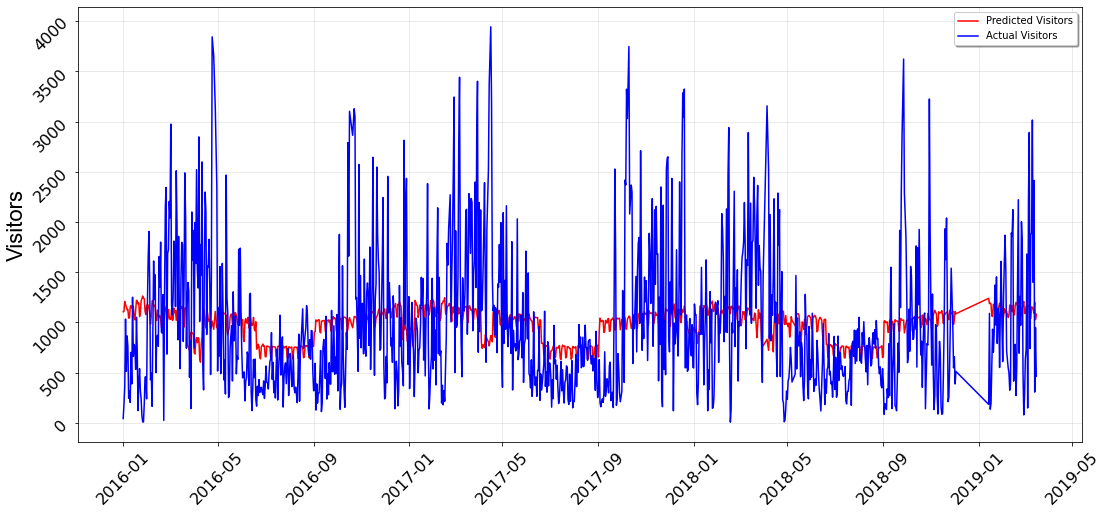

Sample rows:
             Prediction  Actual
Date                           
2016-09-02   903.368790     326
2016-01-28  1235.628225     188
2018-10-18  1052.518429    1147
2016-06-27   768.428599     306
2016-01-24  1212.721041     243
2016-03-01  1030.499711    2041
2016-04-30   947.156312    2348
2016-12-21  1177.170168     765
2017-07-05   762.515337     241
2016-07-12   758.520013     302

rmse 713.7643719504151
std 725.4174140350013


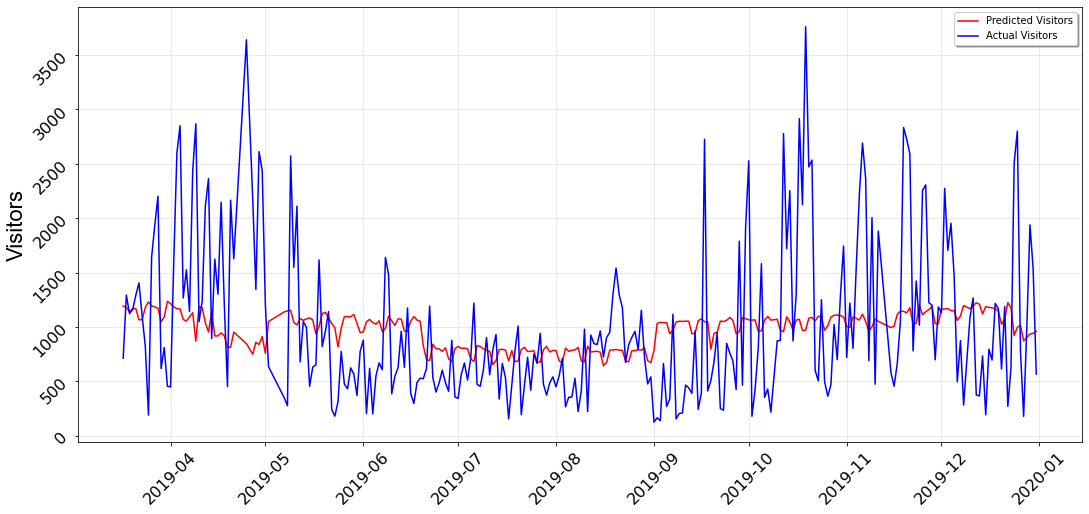

Sample rows:
             Prediction  Actual
Date                           
2019-05-10  1041.705009    1548
2019-04-19   811.878890     451
2019-12-16  1179.874545     795
2019-10-23  1098.655868     504
2019-06-16  1051.598332     387
2019-06-19  1051.865285     528
2019-05-14  1073.167591     996
2019-09-26  1058.608235     685
2019-08-06   785.181336     355
2019-04-08  1130.045513    2429


In [11]:
function.printRes(resTrain)
print()

function.printRes(resTest)